In [2]:
import re
import string
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV

**Carrega as bases de treino e teste**

In [4]:
baseTreino = pd.read_csv(
    'ReutersGrain-train.csv', 
    sep=',',                 # Define o delimitador de campo como vírgula
    quotechar="'",           # Define aspas simples como o caractere de citação
    quoting=1,               # Configura para citar todos os campos (csv.QUOTE_ALL)
    escapechar='\\'          # Define barra invertida como o caractere de escape
)
baseTeste = pd.read_csv(
    'ReutersGrain-test.csv', 
    sep=',',                 # Define o delimitador de campo como vírgula
    quotechar="'",           # Define aspas simples como o caractere de citação
    quoting=1,               # Configura para citar todos os campos (csv.QUOTE_ALL)
    escapechar='\\'          # Define barra invertida como o caractere de escape
)

**Baixa os recursos do NLTK**

In [13]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Inicializa o steemer**

In [14]:
stemmer = PorterStemmer()

**Pré processamento do texto**

In [15]:
def preprocess(text):

    #Tokenização
    tokens = word_tokenize(text.lower())

    #Remoção de stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    #Stemming
    tokens = [stemmer.stem(token) for token in tokens]

    #Reune os tokens em uma string
    processed_text = ' '.join(tokens)

    return processed_text

In [16]:
baseTreino['processed_text'] = baseTreino['Text'].apply(preprocess)

In [17]:
baseTreino

,Text,class-att,processed_text
0,'BAHIA COCOA REVIEW Showers continued througho...,0,'bahia cocoa review shower continu throughout ...
1,'NATIONAL AVERAGE PRICES FOR FARMER-OWNED RESE...,1,'nation averag price farmer-own reserv u.s. ag...
2,'ARGENTINE 1986/87 GRAIN/OILSEED REGISTRATIONS...,1,'argentin 1986/87 grain/oilse registr argentin...
3,'CHAMPION PRODUCTS &lt.CH> APPROVES STOCK SPLI...,0,'champion product & lt.ch > approv stock split...
4,'COMPUTER TERMINAL SYSTEMS &lt.CPML> COMPLETES...,0,'comput termin system & lt.cpml > complet sale...
...,...,...,...
1549,'METEX CORP &lt.MTX> 4TH QTR DEC 28 Shr 22 cts...,0,'metex corp & lt.mtx > 4th qtr dec 28 shr 22 c...
1550,'HOUSTON OIL TRUST &lt.HO> OMITS MARCH DISTRIB...,0,'houston oil trust & lt.ho > omit march distri...
1551,'MONOCLONAL ANTIBODIES &lt.MABS> BUYS COMPANY ...,0,'monoclon antibodi & lt.mab > buy compani mono...
1552,'U.S. TREASURY PROPOSES SOME S. AFRICAN IMPORT...,0,' u. . treasuri propos s. african import treas...


In [18]:
baseTeste['processed_text'] = baseTeste['Text'].apply(preprocess)

In [19]:
baseTeste

,Text,class-att,processed_text
0,'ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN R...,0,'asian export fear damag u.s.-japan rift mount...
1,'CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN ST...,1,'china daili say vermin eat 7-12 pct grain sto...
2,'JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNW...,0,'japan revis long-term energi demand downward ...
3,'THAI TRADE DEFICIT WIDENS IN FIRST QUARTER Th...,1,'thai trade deficit widen first quarter thaila...
4,'INDONESIA SEES CPO PRICE RISING SHARPLY Indon...,0,'indonesia see cpo price rise sharpli indonesi...
...,...,...,...
599,'CORN SUPPLY/DEMAND BY COUNTRY -- USDA The U.S...,1,'corn supply/demand countri -- usda u.s. agric...
600,'USDA REPORTS EXPORT SALES ACTIVITY The U.S. A...,1,'usda report export sale activ u.s. agricultur...
601,'INTERNATIONAL AMERICAN &ltHOME> TO ACQUIRE CO...,0,'intern american & lthome > acquir co intern a...
602,'SONY CHAIRMAN FORECASTS LOWER PROFITS THIS YE...,0,'soni chairman forecast lower profit year soni...


**Realiza o calculo dos atributos de frequencia**

In [20]:
vectorizer = TfidfVectorizer()

x_train = vectorizer.fit_transform(baseTreino['processed_text'])
y_train = baseTreino['class-att']

x_test = vectorizer.fit_transform(baseTreino['processed_text'])
y_test = baseTreino['class-att']

***Executando o algoritmo de DecisionTree na base obtida***

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
paramsDTC = {
    'max_depth': [None, 10, 20, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ["sqrt", "log2", 0.2, 0.4,0.8, 1],
    'criterion': ["gini", "entropy"]
}

In [23]:
gridDTC = GridSearchCV(DecisionTreeClassifier(), paramsDTC, cv=10, scoring='accuracy', n_jobs=-1)

In [24]:
gridDTC.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 50],
                         'max_features': ['sqrt', 'log2', 0.2, 0.4, 0.8, 1],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [25]:
bestParams = gridDTC.best_params_
gridDTC.best_score_

0.9877708850289496

In [26]:
bestParams

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 0.8,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [27]:
dtc = DecisionTreeClassifier(
    criterion=bestParams['criterion'],
    max_depth=bestParams['max_depth'],
    min_samples_leaf=bestParams['min_samples_leaf'],
    min_samples_split=bestParams['min_samples_split'],
    max_features=bestParams['max_features'],
    random_state=42
)

In [28]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=20, max_features=0.8, min_samples_split=10,
                       random_state=42)

In [29]:
resultados = cross_val_predict(dtc, x_test, y_test, cv=10)

In [30]:
print(metrics.classification_report(y_test, resultados, digits=4))

              precision    recall  f1-score   support

           0     0.9911    0.9924    0.9917      1451
           1     0.8911    0.8738    0.8824       103

    accuracy                         0.9846      1554
   macro avg     0.9411    0.9331    0.9370      1554
weighted avg     0.9844    0.9846    0.9845      1554



In [31]:
cm = metrics.confusion_matrix(y_test, resultados)

In [32]:
cm

array([[1440,   11],
       [  13,   90]])

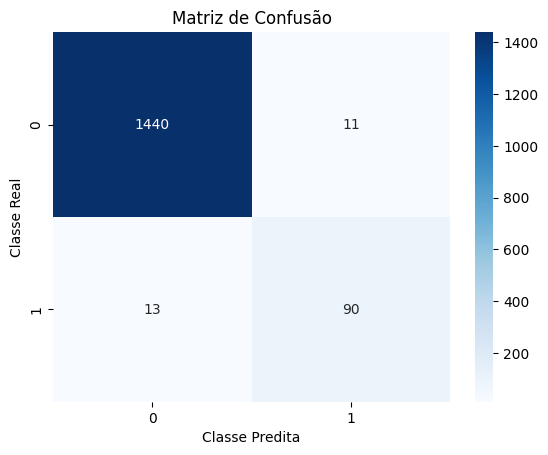

In [33]:
classes = [0,1]
sns.heatmap(cm, annot=True, xticklabels=classes, yticklabels=classes, fmt='d', cmap='Blues')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

***Executando o algoritmo de RandomForest na base obtida***

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rfc = RandomForestClassifier(
    n_estimators=100,
    criterion=bestParams['criterion'],
    max_depth=bestParams['max_depth'],
    min_samples_leaf=bestParams['min_samples_leaf'],
    min_samples_split=bestParams['min_samples_split'],
    max_features=bestParams['max_features'],
    random_state=42
    )

In [36]:
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, max_features=0.8, min_samples_split=10,
                       random_state=42)

In [37]:
resultados = cross_val_predict(rfc, x_test, y_test, cv=10)

In [38]:
print(metrics.classification_report(y_test, resultados, digits=4))

              precision    recall  f1-score   support

           0     0.9911    0.9945    0.9928      1451
           1     0.9184    0.8738    0.8955       103

    accuracy                         0.9865      1554
   macro avg     0.9547    0.9341    0.9441      1554
weighted avg     0.9863    0.9865    0.9863      1554



In [39]:
cm = metrics.confusion_matrix(y_test, resultados)

In [40]:
cm

array([[1443,    8],
       [  13,   90]])

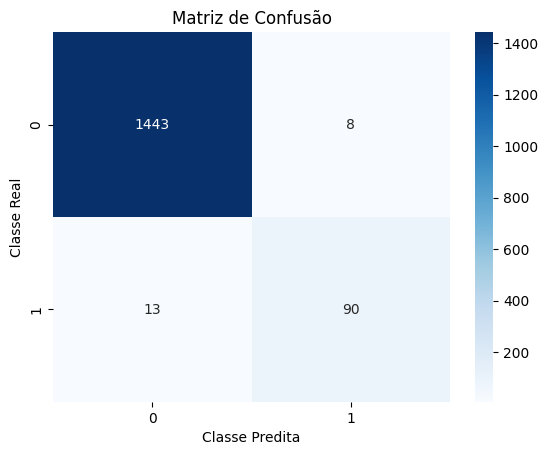

In [41]:
classes = [0,1]
sns.heatmap(cm, annot=True, xticklabels=classes, yticklabels=classes, fmt='d', cmap='Blues')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

***Executando o algoritmo de NeuralNetwork na base obtida***

In [42]:
from sklearn.neural_network import MLPClassifier

In [43]:
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 100, 100),
    activation='relu',
    alpha=0.0001,
    learning_rate='adaptive',
    solver='adam',
    random_state=42
)

In [44]:
mlp.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 100), learning_rate='adaptive',
              random_state=42)

In [45]:
resultados = cross_val_predict(mlp, x_test, y_test, cv=10)

In [46]:
print(metrics.classification_report(y_test, resultados, digits=4))

              precision    recall  f1-score   support

           0     0.9857    0.9945    0.9901      1451
           1     0.9111    0.7961    0.8497       103

    accuracy                         0.9813      1554
   macro avg     0.9484    0.8953    0.9199      1554
weighted avg     0.9807    0.9813    0.9808      1554



In [47]:
cm = metrics.confusion_matrix(y_test, resultados)

In [48]:
cm

array([[1443,    8],
       [  21,   82]])

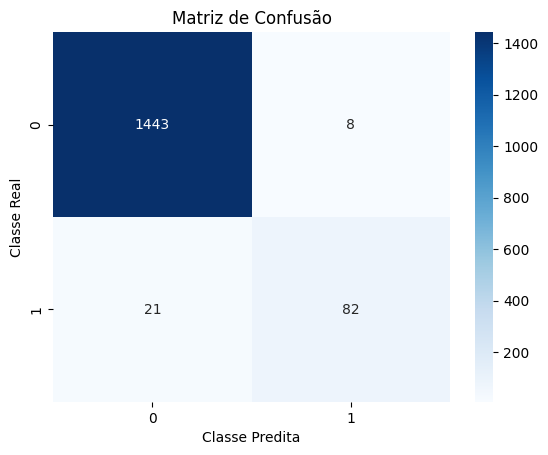

In [49]:
classes = [0,1]
sns.heatmap(cm, annot=True, xticklabels=classes, yticklabels=classes, fmt='d', cmap='Blues')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()